## import library

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

## read main csv file

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.drop(columns='patient_nbr')

,encounter_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,Caucasian,Male,[70-80),?,1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,Caucasian,Female,[80-90),?,2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Deal with missing data
 This is because missing values can affect the accuracy of subsequent preprocessing steps. You can choose to either remove the missing data or fill them in using methods such as mean, median, or mode imputation.

In [3]:
df.replace('?', np.nan, inplace=True)
df.replace('None', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)

# replace missing values in numerical columns with mean
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
for col in numerical_cols:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

# replace missing values in string columns with mode
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

# Check for missing values after imputation
missing_values_count = df.isna().sum()
print(missing_values_count)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

## Encode categorical variables
 If your dataset contains categorical variables, you should encode them as numerical values before performing any further preprocessing. This is because most machine learning algorithms require numerical inputs.

In [4]:
# identify columns with string values
str_cols = df.select_dtypes(include=['object']).columns

# initialize a LabelEncoder object and a dictionary to store the mappings
le = LabelEncoder()
mapping_dict = {}

# encode each column with string values and store the mappings in the dictionary
for col in str_cols:
    df[col] = le.fit_transform(df[col])
    mapping_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# print the encoded dataframe and the mapping dictionary
display(df)
print(mapping_dict)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,0,8,6,25,1,1,...,0,1,1,0,0,0,0,1,0,2
1,149190,55629189,2,0,1,8,1,1,7,3,...,0,3,1,0,0,0,0,0,1,1
2,64410,86047875,0,0,2,8,1,1,7,2,...,0,1,1,0,0,0,0,1,1,2
3,500364,82442376,2,1,3,8,1,1,7,2,...,0,3,1,0,0,0,0,0,1,2
4,16680,42519267,2,1,4,8,1,1,7,1,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,8,1,3,7,3,...,0,0,1,0,0,0,0,0,1,1
101762,443847782,74694222,0,0,8,8,1,4,5,5,...,0,2,1,0,0,0,0,1,1,2
101763,443854148,41088789,2,1,7,8,1,1,7,1,...,0,0,1,0,0,0,0,0,1,2
101764,443857166,31693671,2,0,8,8,2,3,7,10,...,0,3,1,0,0,0,0,0,1,2


{'race': {'AfricanAmerican': 0, 'Asian': 1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4}, 'gender': {'Female': 0, 'Male': 1, 'Unknown/Invalid': 2}, 'age': {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}, 'weight': {'>200': 0, '[0-25)': 1, '[100-125)': 2, '[125-150)': 3, '[150-175)': 4, '[175-200)': 5, '[25-50)': 6, '[50-75)': 7, '[75-100)': 8}, 'payer_code': {'BC': 0, 'CH': 1, 'CM': 2, 'CP': 3, 'DM': 4, 'FR': 5, 'HM': 6, 'MC': 7, 'MD': 8, 'MP': 9, 'OG': 10, 'OT': 11, 'PO': 12, 'SI': 13, 'SP': 14, 'UN': 15, 'WC': 16}, 'medical_specialty': {'AllergyandImmunology': 0, 'Anesthesiology': 1, 'Anesthesiology-Pediatric': 2, 'Cardiology': 3, 'Cardiology-Pediatric': 4, 'DCPTEAM': 5, 'Dentistry': 6, 'Dermatology': 7, 'Emergency/Trauma': 8, 'Endocrinology': 9, 'Endocrinology-Metabolism': 10, 'Family/GeneralPractice': 11, 'Gastroenterology': 12, 'Gynecology': 13, 'Hematology': 14, 'Hematology/Oncology': 15, '

## Correlation Coefficient
 The correlation coefficient measures the strength and direction of the linear relationship between two variables. The code selects important columns by calculating their correlation with the "readmitted" column and choosing those with a correlation coefficient greater than a threshold value, which can be used for further analysis or modeling.

,patient_nbr,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
0,8222157,1,1,0,0,0,1,0,2
1,55629189,3,18,0,0,0,9,1,1
2,86047875,2,13,2,0,1,6,1,2
3,82442376,2,16,0,0,0,7,1,2
4,42519267,1,8,0,0,0,5,1,2


['patient_nbr', 'time_in_hospital', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diabetesMed', 'readmitted']


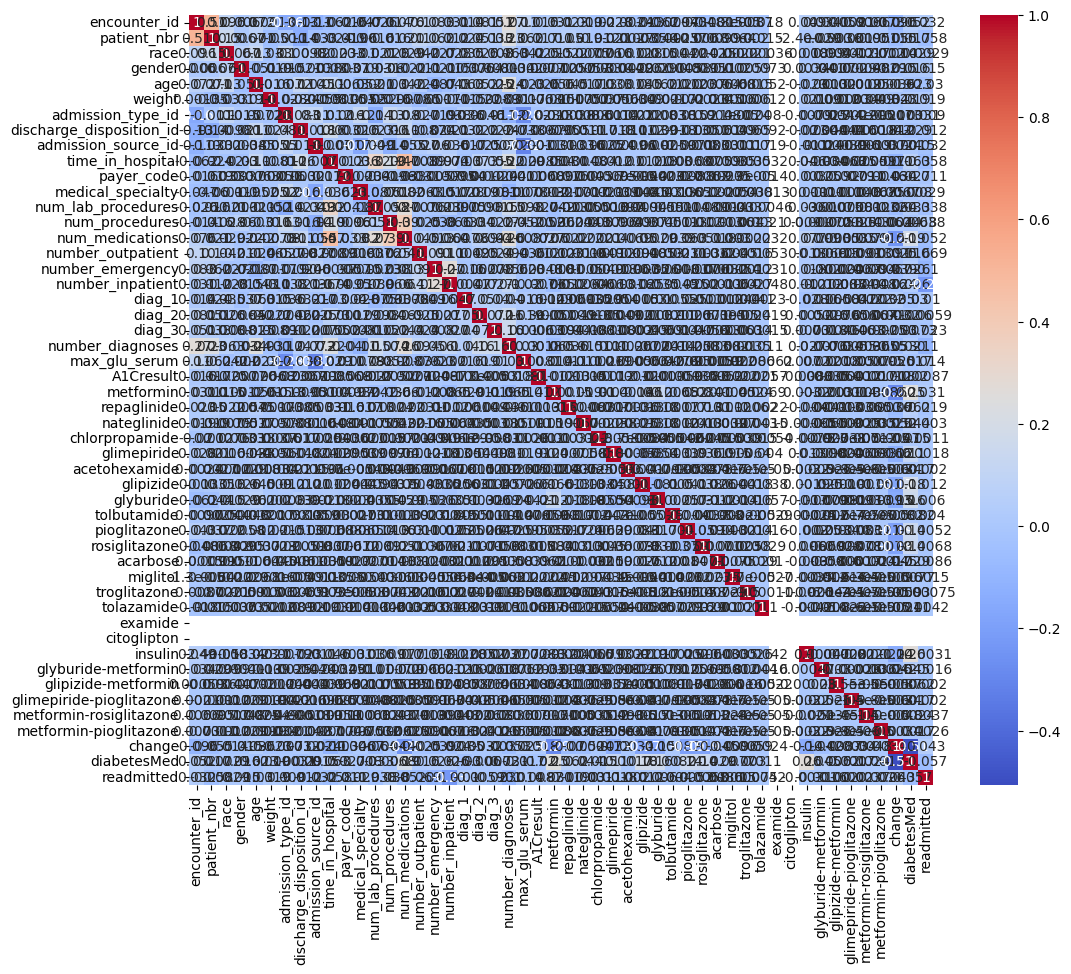

In [5]:
# calculate correlation coefficient
corr = df.corr()["readmitted"]

# plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# select columns with correlation coefficient greater than a threshold
threshold = 0.05
important_columns = corr[abs(corr) > threshold].index.tolist()

# use important columns for further analysis
df_important = df[important_columns]
df_important_copy =  df_important.copy(deep=True)
display(df_important.head())

columns = df_important.columns.tolist()
print(columns)

## Using The Elobw Method

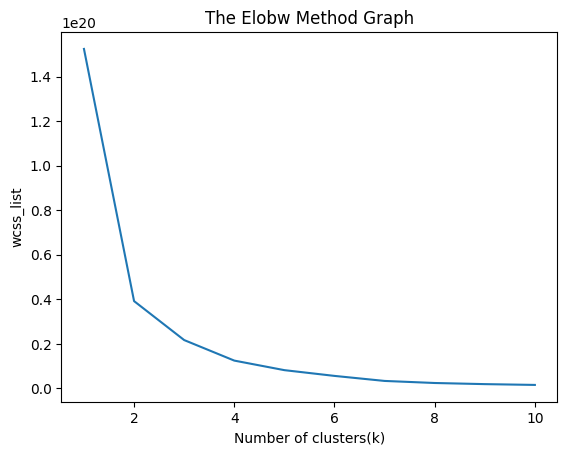

In [6]:
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(df_important)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')


plt.show()

# Implement k-means , get silhouette and visualization

Silhouette: 0.605897116249437


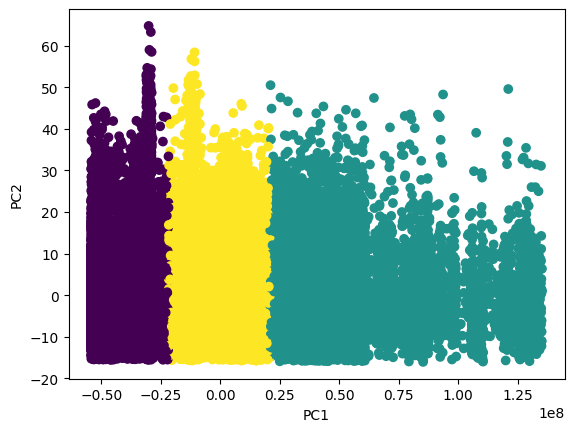

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_important)

# Apply K-means clustering to the transformed data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)
kmeans.fit(df_important)

y_pred = kmeans.predict(df_important)
silhouette = silhouette_score(df_important, y_pred)

print("Silhouette:" , silhouette)
# Plot the clustering results in the reduced 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ______________________________________________________________________

# Implement KNN , get accuracy and visualization

### feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_important_copy.drop(['readmitted'],axis = 1)),columns=['patient_nbr', 'time_in_hospital', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diabetesMed'])
y = df_important_copy['readmitted']
print(y.shape, X.shape)

(101766,) (101766, 8)


### Test Train Split and Cross Validation methods

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [10]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [11]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.99705206060963 % and k = [1]


In [12]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 54.32167914627676 % and k = [14]


### Result Visualisation

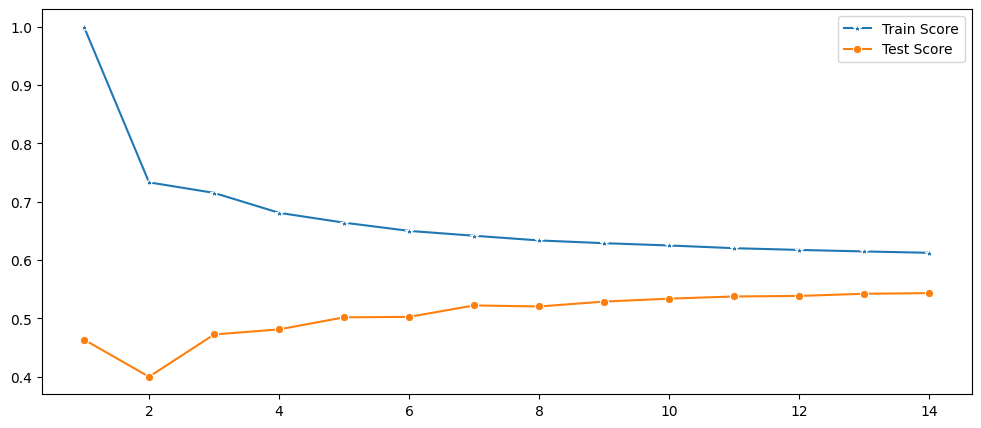

In [13]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15),y=test_scores,marker='o',label='Test Score')